In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
# loading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv", header = None)

In [5]:
# Renaming the columns
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_Type']

In [6]:
df.head(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [7]:
df.tail(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# Exploratory Data Analysis

In [8]:
# Checking the dimensions of the dataset.
df.shape

(214, 11)

In [9]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Glass_Type'],
      dtype='object')

In [10]:
# Checking types of columns
df.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
Glass_Type      int64
dtype: object

In [11]:
df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_Type    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass_Type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


<Axes: >

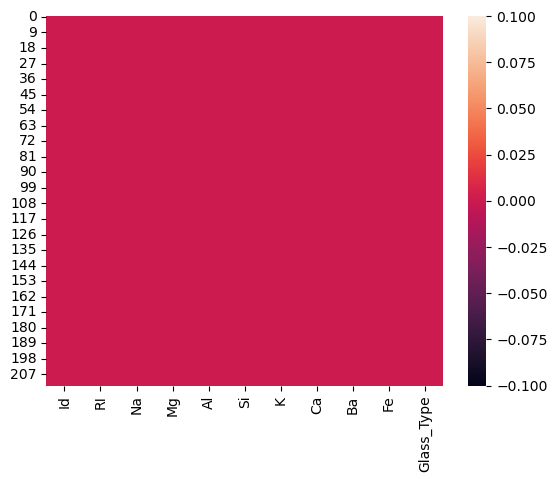

In [13]:
# Now visualize using heatmap.
sns.heatmap(df.isnull(), cmap = "cool_r")

In [14]:
df['Glass_Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [15]:
df['Glass_Type'].nunique()

6

In [16]:
# Checking value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Id
1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: count, Length: 214, dtype: int64


RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64


K
0.00    30
0.57    1

# Description of Dataset

In [17]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


1. Count of all the columns are same and there are no missing values in the dataset.
2. Mean is greater than the median that means right skewness is possible ie. positively skewed.
3. Between 75% and max difference can be seen, outliers might be present.

# Data Visualization

Glass_Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


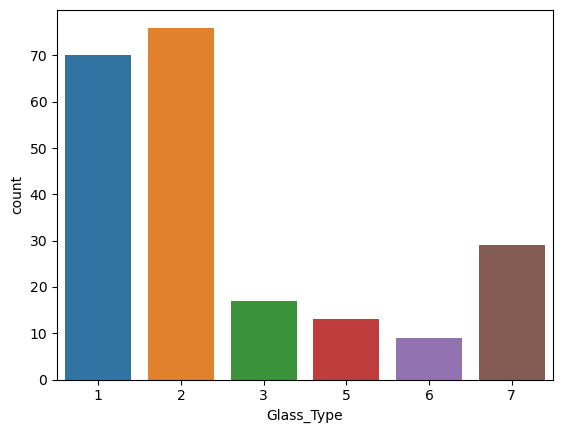

In [20]:
ax = sns.countplot(x = 'Glass_Type', data = df)
print(df['Glass_Type'].value_counts())

As we can see here that the difference is huge between the Glass_type, it can lead to class imbalance which can be rectified by oversampling.

# Checking Correlation

In [21]:
cor = df.corr()
print(cor)

                  Id        RI        Na        Mg        Al        Si  \
Id          1.000000 -0.072209  0.375722 -0.650328  0.490113  0.061232   
RI         -0.072209  1.000000 -0.191885 -0.122274 -0.407326 -0.542052   
Na          0.375722 -0.191885  1.000000 -0.273732  0.156794 -0.069809   
Mg         -0.650328 -0.122274 -0.273732  1.000000 -0.481799 -0.165927   
Al          0.490113 -0.407326  0.156794 -0.481799  1.000000 -0.005524   
Si          0.061232 -0.542052 -0.069809 -0.165927 -0.005524  1.000000   
K           0.003149 -0.289833 -0.266087  0.005396  0.325958 -0.193331   
Ca          0.090800  0.810403 -0.275442 -0.443750 -0.259592 -0.208732   
Ba          0.451001 -0.000386  0.326603 -0.492262  0.479404 -0.102151   
Fe         -0.072794  0.143010 -0.241346  0.083060 -0.074402 -0.094201   
Glass_Type  0.877357 -0.164237  0.502898 -0.744993  0.598829  0.151565   

                   K        Ca        Ba        Fe  Glass_Type  
Id          0.003149  0.090800  0.451001 -0.07

<Axes: >

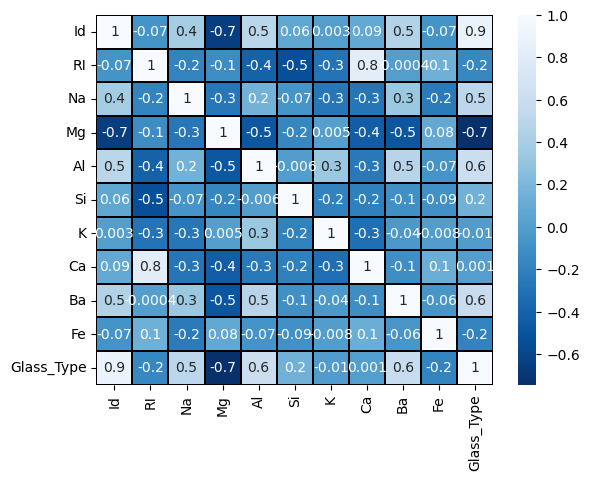

In [22]:
sns.heatmap(df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

#  Checking Outliers

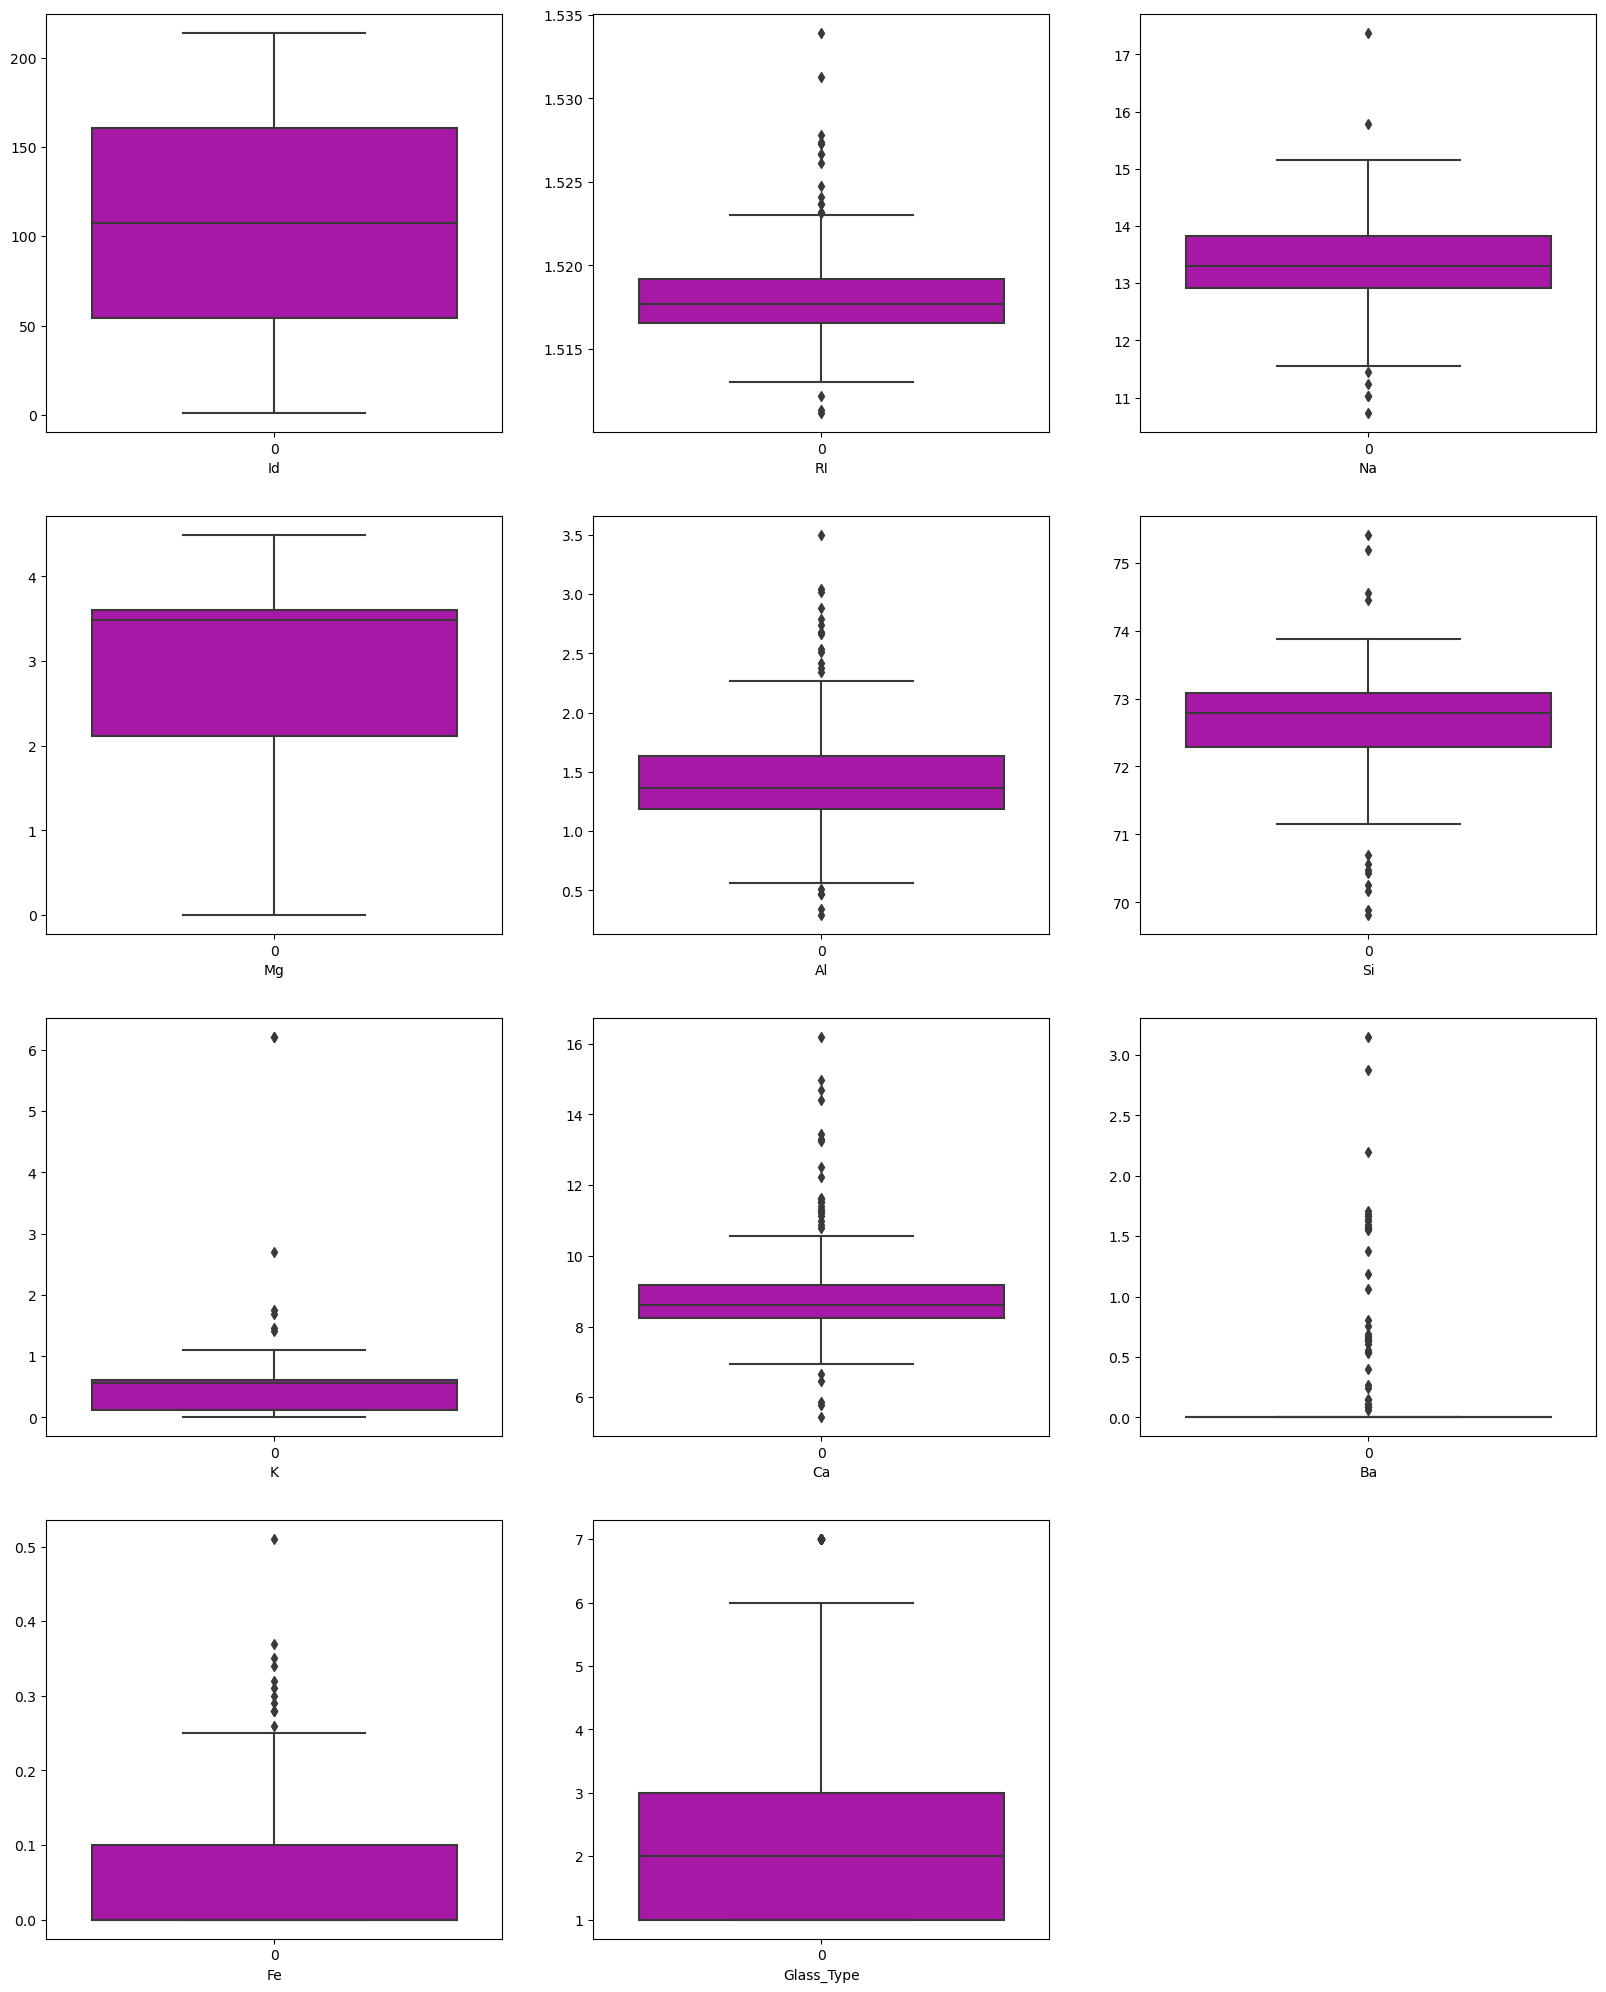

In [23]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <= 13:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot(df[column], color = 'm')
        plt.xlabel(column, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.show()    

In [24]:
# Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold = 3
np.where(z<3)

(array([  0,   0,   0, ..., 213, 213, 213], dtype=int64),
 array([ 0,  1,  2, ...,  7,  9, 10], dtype=int64))

In [25]:
df=df[(z<3).all(axis = 1)]
df.shape

(194, 11)

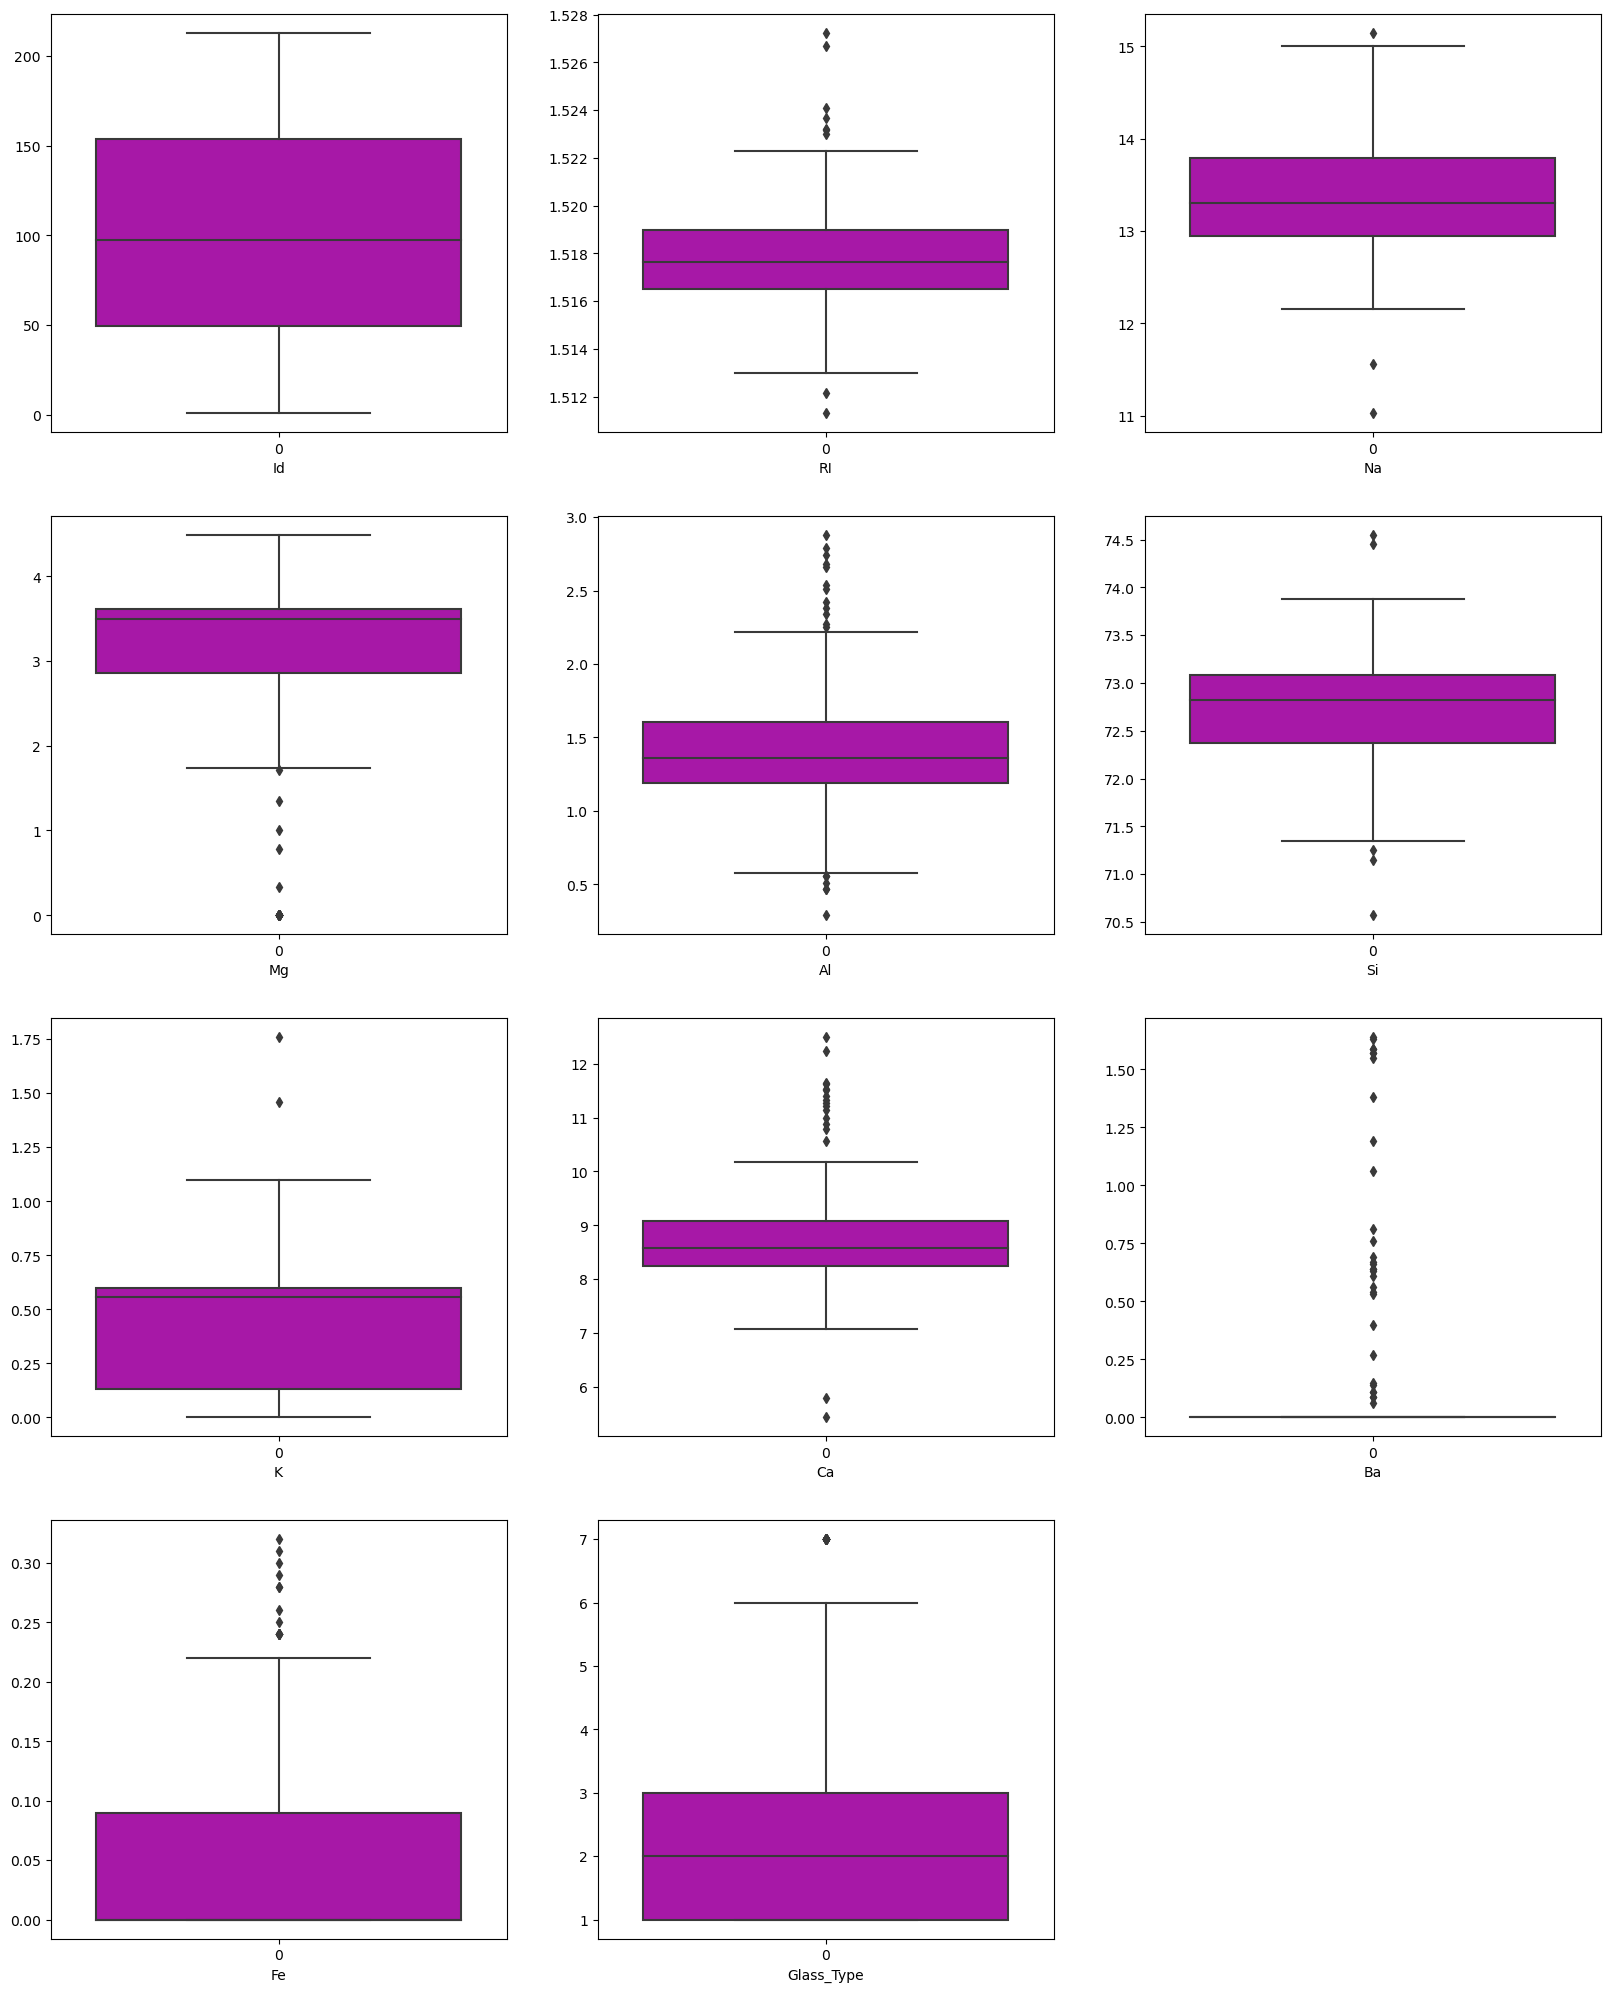

In [26]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <= 13:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot(df[column], color = 'm')
        plt.xlabel(column, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.show()    

In [27]:
df.skew()

Id            0.107537
RI            0.952733
Na            0.371482
Mg           -1.528849
Al            0.658259
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            3.188587
Fe            1.486479
Glass_Type    1.284007
dtype: float64

In [28]:
# Dropping Ca and ba column.
df=df.drop(['Ca', 'Ba'], axis=1)

In [35]:
df.skew()

Id            0.107537
RI            0.952733
Na            0.371482
Mg           -1.757217
Al            0.658259
Si           -0.425450
K             0.303175
Fe            1.486479
Glass_Type    1.284007
dtype: float64

In [34]:
df['Mg'] = np.log1p(df['Mg'])

In [36]:
# Dividing dataset into features and label
y = df['Glass_Type']
x = df.drop(columns = ['Glass_Type'])

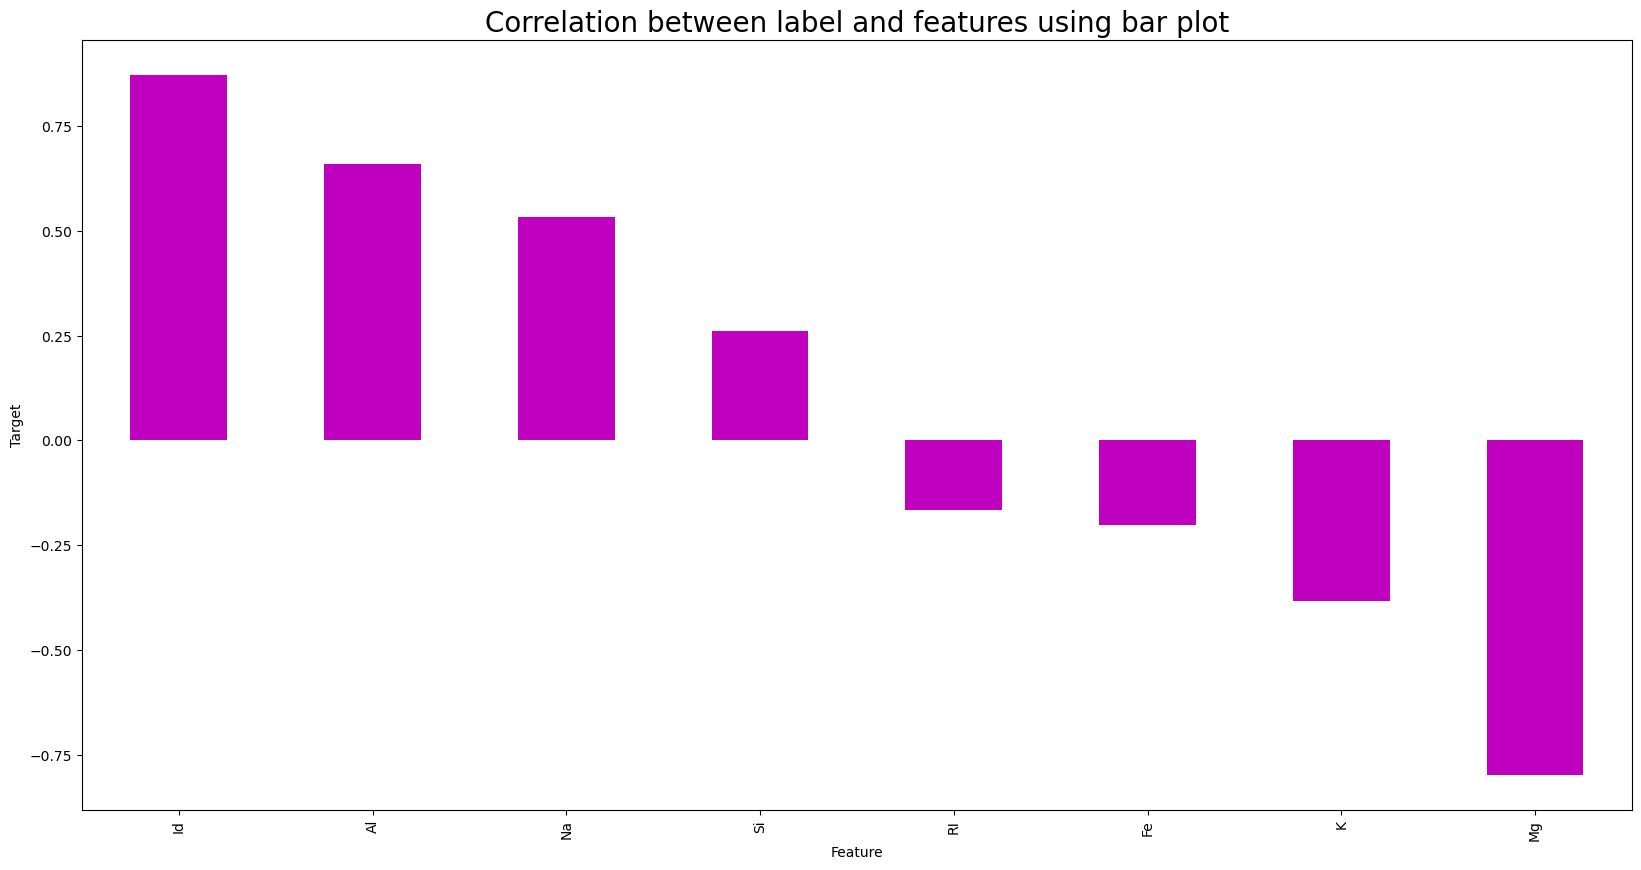

In [37]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize=(20, 10))
df.corr()['Glass_Type'].sort_values(ascending = False).drop(['Glass_Type']).plot(kind = 'bar', color = 'm')
plt.xlabel('Feature', fontsize = 10)
plt.ylabel('Target', fontsize = 10)
plt.title("Correlation between label and features using bar plot", fontsize = 20)
plt.show()

# Feature Scaling using Standard Scalarization

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Id,RI,Na,Mg,Al,Si,K,Fe
0,-1.649313,1.291781,0.332127,0.839937,-0.729105,-1.612464,-1.319609,-0.603056
1,-1.633019,-0.197832,0.704398,0.512168,-0.141722,0.016082,0.172091,-0.603056
2,-1.616725,-0.824346,0.168328,0.491915,0.264928,0.461790,-0.147559,-0.603056
3,-1.600431,-0.175926,-0.308179,0.548075,-0.299864,-0.189629,0.491741,-0.603056
4,-1.584137,-0.281075,-0.218834,0.520207,-0.412822,0.616073,0.420708,-0.603056
...,...,...,...,...,...,...,...,...
189,1.739854,-0.727959,1.419158,-2.315835,2.975928,0.221793,-1.532708,-0.603056
190,1.756148,-0.802440,1.076668,-2.315835,3.292211,-0.189629,-1.248575,-0.603056
191,1.772442,-0.530805,2.238153,-2.315835,1.281553,0.581788,-1.532708,-0.603056
192,1.788737,1.134057,1.404267,-2.315835,1.349328,1.198921,-1.532708,-0.603056


#### Checking Variance Inflation Factor

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.908268,Id
1,4.915524,RI
2,3.802465,Na
3,5.744401,Mg
4,3.312112,Al
5,4.680123,Si
6,2.622876,K
7,1.065509,Fe


Nearly all values are less than 5.

# Oversampling

In [40]:
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [41]:
y.value_counts()

Glass_Type
1    70
2    68
7    23
3    16
5     9
6     8
Name: count, dtype: int64

In [42]:
y1.value_counts()

Glass_Type
1    70
2    70
3    70
5    70
6    70
7    70
Name: count, dtype: int64

Now the class looks balanced, lets go for model building.

# Model Building 

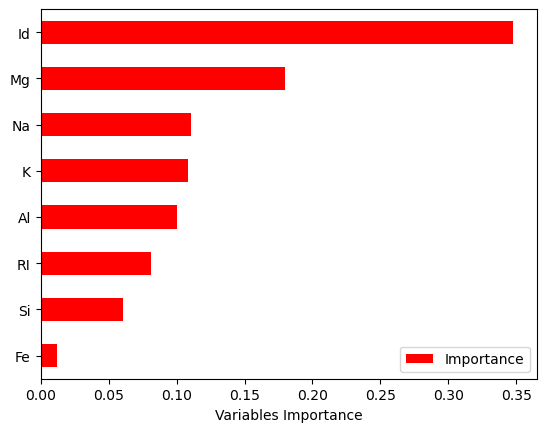

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

importance = pd.DataFrame({'Importance': rf_classifier.feature_importances_}, index=x.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel('Variables Importance')
plt.legend(loc="lower right")
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=70)


model = RandomForestClassifier(random_state=60)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9761904761904762
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.90      0.95        20
           3       0.92      1.00      0.96        24
           5       1.00      1.00      1.00        18
           6       0.96      1.00      0.98        24
           7       1.00      0.95      0.97        20

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



# Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, -1],
              'n_estimators' : [50, 100, 200, 300]}

In [48]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)

In [49]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, -1],
                         'random_state': [10, 50, 1000]})

In [50]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 50}

In [59]:
Final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100, n_jobs = -2, random_state = 70)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

97.61904761904762


In [60]:
# Saving Model
import joblib
joblib.dump(Final_model, "Glass_Identification_Dataset_Analysis.pkl")

['Glass_Identification_Dataset_Analysis.pkl']

In [61]:
model = joblib.load("Glass_Identification_Dataset_Analysis.pkl")
predictions = model.predict(x_test)
predictions

array([6, 1, 5, 2, 3, 1, 3, 1, 7, 1, 2, 6, 5, 3, 5, 1, 1, 7, 6, 6, 2, 5,
       2, 3, 1, 6, 1, 2, 7, 3, 5, 6, 6, 2, 5, 5, 5, 2, 3, 1, 6, 7, 5, 7,
       6, 7, 6, 6, 6, 1, 5, 1, 6, 7, 3, 6, 3, 3, 5, 3, 3, 3, 6, 2, 2, 6,
       3, 2, 7, 7, 7, 2, 7, 3, 6, 3, 1, 5, 2, 7, 6, 2, 2, 1, 3, 3, 7, 1,
       3, 1, 2, 1, 6, 5, 7, 2, 6, 7, 6, 7, 5, 3, 6, 6, 7, 5, 5, 7, 7, 1,
       5, 3, 2, 3, 1, 1, 2, 5, 3, 6, 3, 3, 3, 1, 1, 3], dtype=int64)

In [62]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predictions
df['Original'] = a
df

,Predicted,Original
0,6,6
1,1,1
2,5,5
3,2,2
4,3,3
...,...,...
121,3,3
122,3,3
123,1,1
124,1,1
